## Logistic Regression
### About Logistic Regression
Logistic regression is a classification algorithm that is used to assign observations to a discrete set of classes.
It is a generalization of linear regression where the dependent variable is categorical and not continuous. In logistic
regression, the dependent variable is a binary variable that contains data coded as 1 (yes,
success, etc.) or 0 (no, failure, etc.).


## Assumptions of Logistic Regression
1. The dependent variables must be categorical
2. There should be no outliers
3. Therer should not be correlation among independent variables

In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [11]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# preprocessing the data
# dropping deck column because of too much missing values
df.drop(columns=['deck'], inplace=True)
# impute missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
# impute missing values in emark and embark_town
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


# Encoding the categorical variables using for loop where object and category are data type
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

# X and y column
X = df.drop('survived', axis=1)
y = df['survived']

C:\Users\UZAIR\AppData\Local\Temp\ipykernel_8920\317127627.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\UZAIR\AppData\Local\Temp\ipykernel_8920\317127627.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\UZAIR\miniconda3\envs\py_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# evaluate the model
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Recall Score", recall_score(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy Score 1.0
Recall Score 1.0
Precision Score 1.0
F1 Score 1.0
Confusion Matrix 
 [[115   0]
 [  0  64]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



<Axes: >

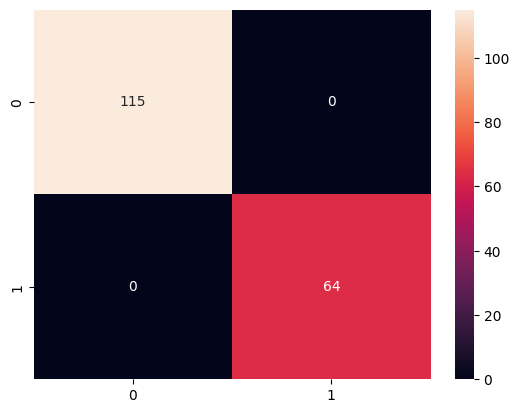

In [18]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')